https://en.wikipedia.org/wiki/Public_holidays_in_France

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data/2yrs_data.csv')

In [29]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
1070561,2008-12-31,23:55:00,0.484,0.064,247.69,2.2,0.0,0.0,0.0
1070562,2008-12-31,23:56:00,0.482,0.064,247.35,2.2,0.0,0.0,0.0
1070563,2008-12-31,23:57:00,0.482,0.064,246.99,2.2,0.0,0.0,0.0
1070564,2008-12-31,23:58:00,0.480,0.064,246.52,2.2,0.0,0.0,0.0


In [30]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.070566e+06,1.070566e+06,1.070566e+06,1.070566e+06,1.070566e+06,1.070566e+06,1.070566e+06
mean,1.111015e+00,1.175271e-01,2.400377e+02,4.726981e+00,1.172083e+00,1.461822e+00,5.945433e+00
std,1.127619e+00,1.091758e-01,3.310610e+00,4.754078e+00,6.306987e+00,6.335942e+00,8.219855e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.900000e-01,0.000000e+00,2.380300e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.560000e-01,9.800000e-02,2.402700e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.548000e+00,1.840000e-01,2.422300e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01


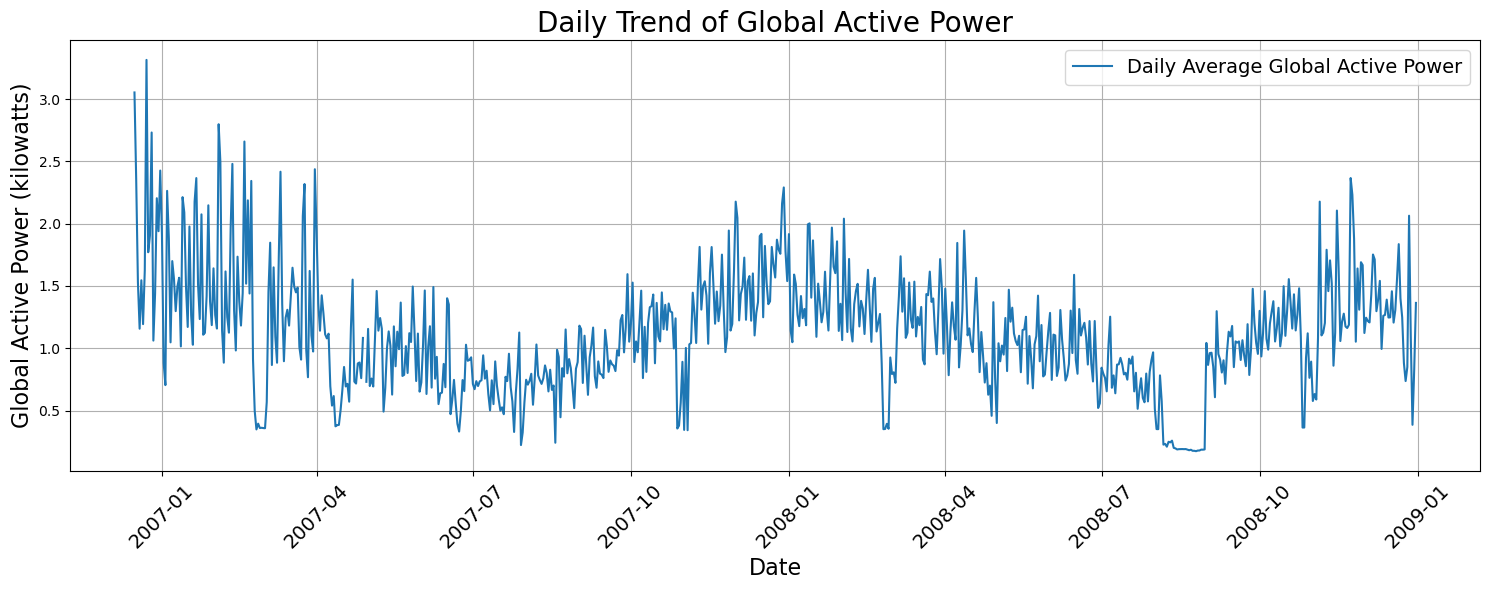

In [31]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
daily_average = df['Global_active_power'].resample('D').mean()

split_index = int(len(daily_average) * 0.8)
split_date = daily_average.index[split_index]  # Get the corresponding date for the 80% point


plt.figure(figsize=(15, 6))
plt.plot(daily_average.index, daily_average, label='Daily Average Global Active Power', linewidth=1.5)

# Add a dashed line at the split point
# plt.axvline(x=split_date, color='red', linestyle='--', label=f'Train Test Split Point ({split_date.date()})')


plt.title("Daily Trend of Global Active Power", fontsize = 20)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Global Active Power (kilowatts)", fontsize = 16)
plt.grid(True)
plt.legend(fontsize = 14)
plt.xticks(rotation=45, fontsize = 14)
plt.tight_layout()
plt.show()

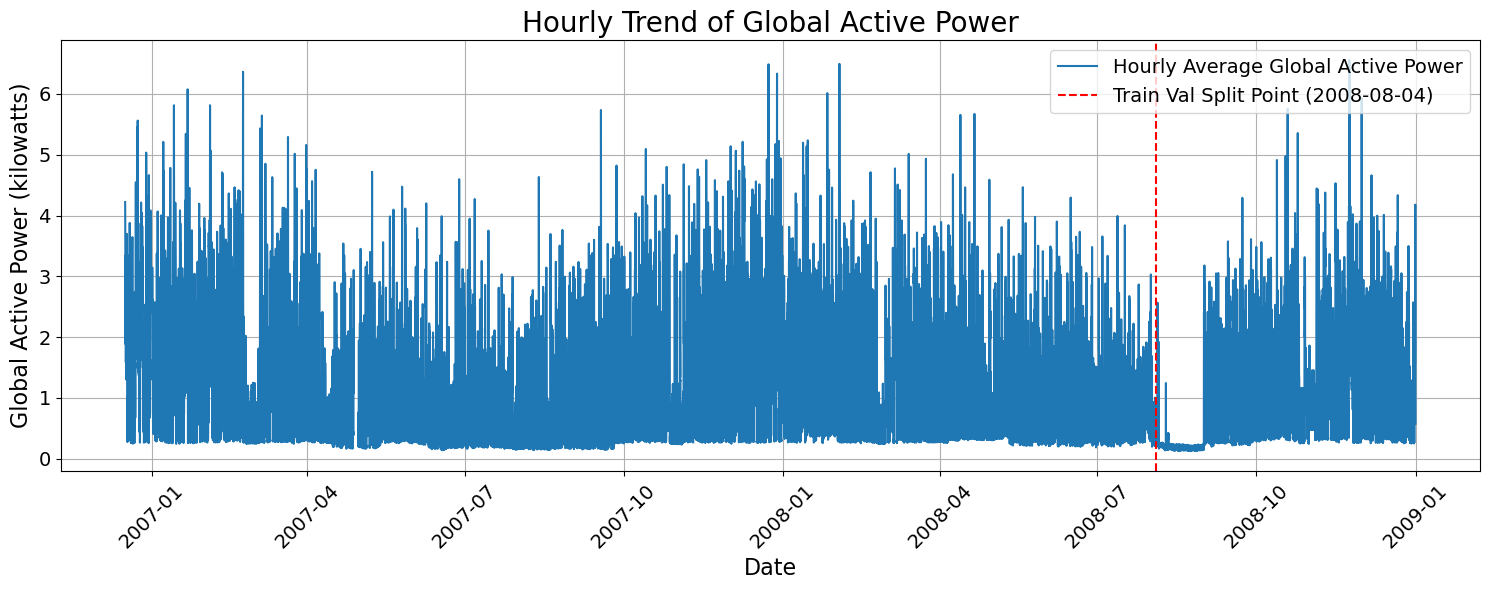

In [24]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
hourly_average = df['Global_active_power'].resample('H').mean()


split_index = int(len(daily_average) * 0.8)
split_date = daily_average.index[split_index]  # Get the corresponding date for the 80% point

plt.figure(figsize=(15, 6))
plt.plot(hourly_average.index, hourly_average, label='Hourly Average Global Active Power', linewidth=1.5)

plt.axvline(x=split_date, color='red', linestyle='--', label=f'Train Val Split Point ({split_date.date()})')

plt.title("Hourly Trend of Global Active Power", fontsize = 20)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Global Active Power (kilowatts)", fontsize = 16)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

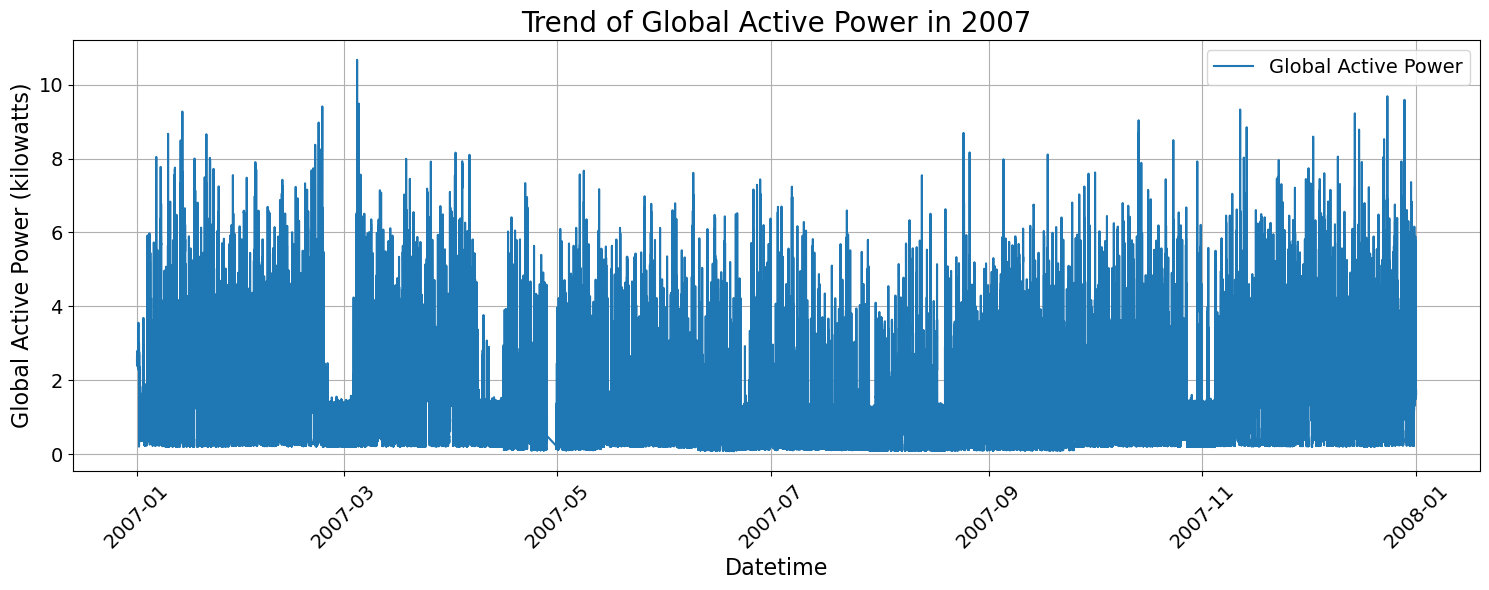

In [33]:
year_data = df.loc['2007']

plt.figure(figsize=(15, 6))
plt.plot(year_data.index, year_data['Global_active_power'], label='Global Active Power')
plt.title("Trend of Global Active Power in 2007", fontsize = 20)
plt.xlabel("Datetime", fontsize = 16)
plt.ylabel("Global Active Power (kilowatts)", fontsize = 16)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

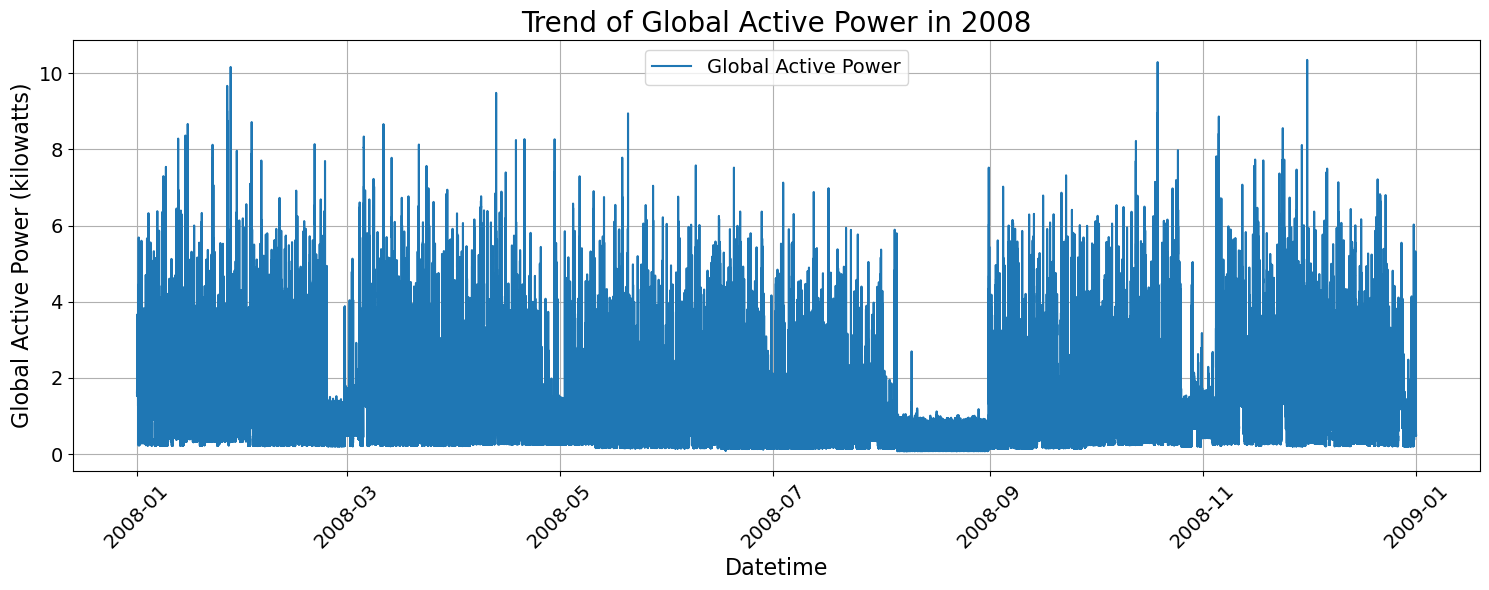

In [34]:
year_data = df.loc['2008']

plt.figure(figsize=(15, 6))
plt.plot(year_data.index, year_data['Global_active_power'], label='Global Active Power')
plt.title("Trend of Global Active Power in 2008", fontsize = 20)
plt.xlabel("Datetime", fontsize = 16)
plt.ylabel("Global Active Power (kilowatts)", fontsize = 16)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

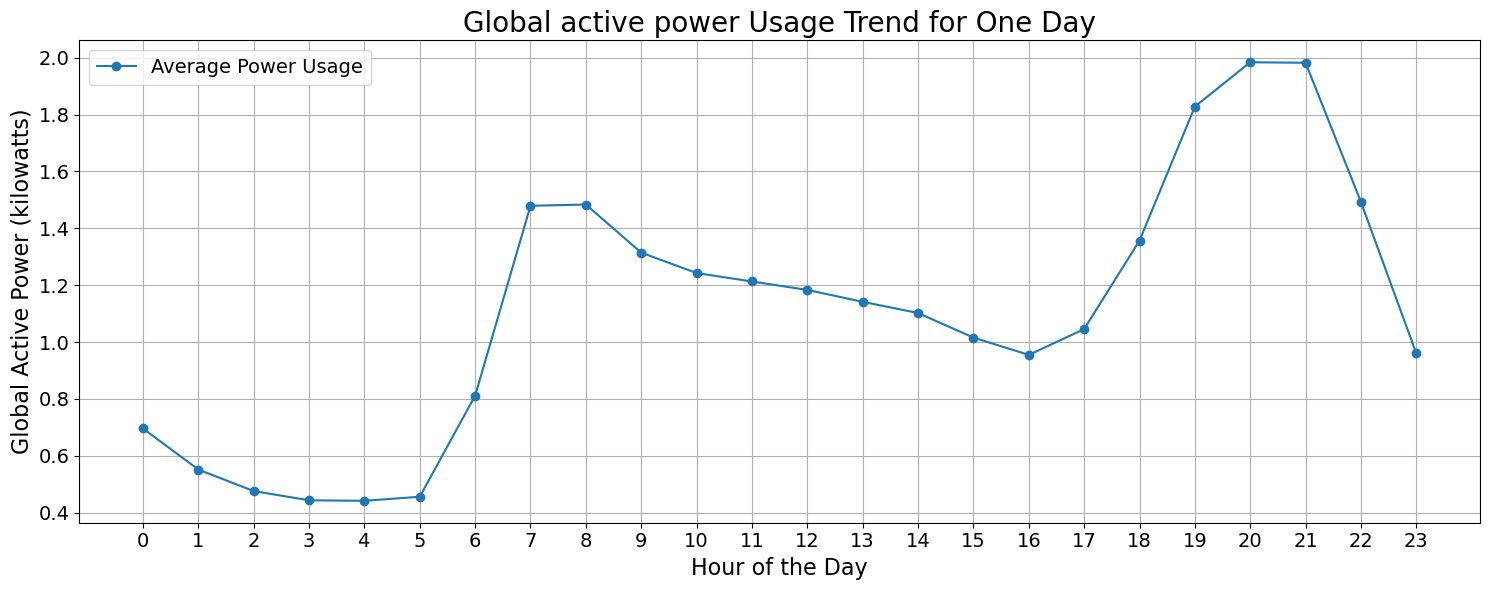

In [39]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['Datetime'].dt.hour

hourly_average = df.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(15, 6))
plt.plot(hourly_average.index, hourly_average, marker='o', linestyle='-',  label='Average Power Usage')
plt.title("Global active power Usage Trend for One Day", fontsize=20)
plt.xlabel("Hour of the Day", fontsize=16)
plt.ylabel("Global Active Power (kilowatts)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(range(0,24), fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()